In [7]:
from mplchart.chart import Chart
from mplchart.helper import get_prices

from mplchart.primitives import Candlesticks, Volume, TradeMarker, Peaks, SameAxes

from mintalib.indicators import SMA, EMA, RSI, ATR, PSAR, ROC, SLOPE, MACD, PPO


In [8]:
ticker = 'AAPL'
freq = 'daily'
prices = get_prices(ticker, freq=freq)
prices

,open,high,low,close,volume
date,,,,,
1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600
1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800
1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000
1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600
1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600
...,...,...,...,...,...
2022-08-01,160.786659,163.363082,160.666830,161.285965,67829400
2022-08-02,159.877927,162.184720,159.408578,159.788040,59907000
2022-08-03,160.616896,166.358920,160.527024,165.899567,82507500


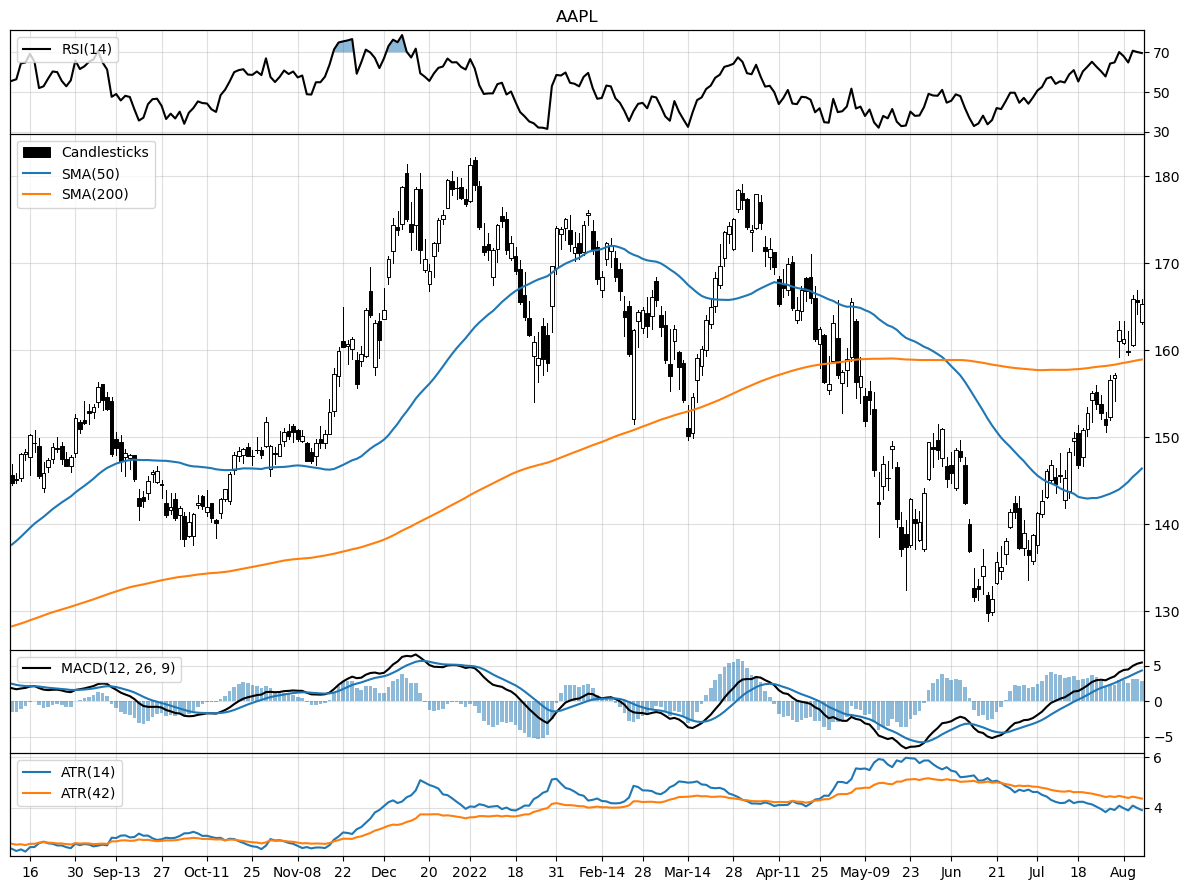

In [10]:
max_bars = 250

indicators = [
    Candlesticks(), SMA(50), SMA(200),
    RSI(),
    MACD(),
    ATR(14),  SameAxes(), ATR(42),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)


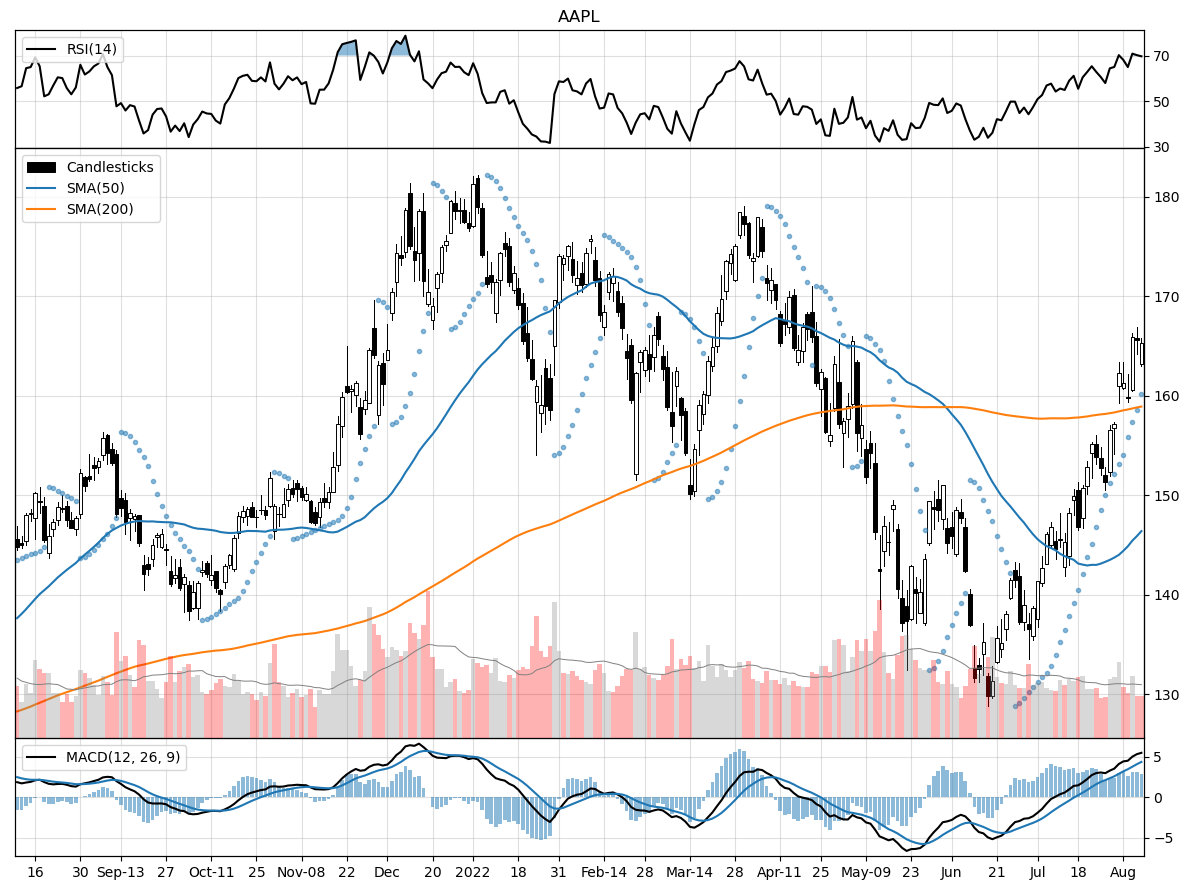

In [12]:
indicators = [
    Candlesticks(use_bars=False), PSAR(), SMA(50), SMA(200),
    Volume(), RSI(), MACD(),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)


CPU times: total: 516 ms
Wall time: 586 ms


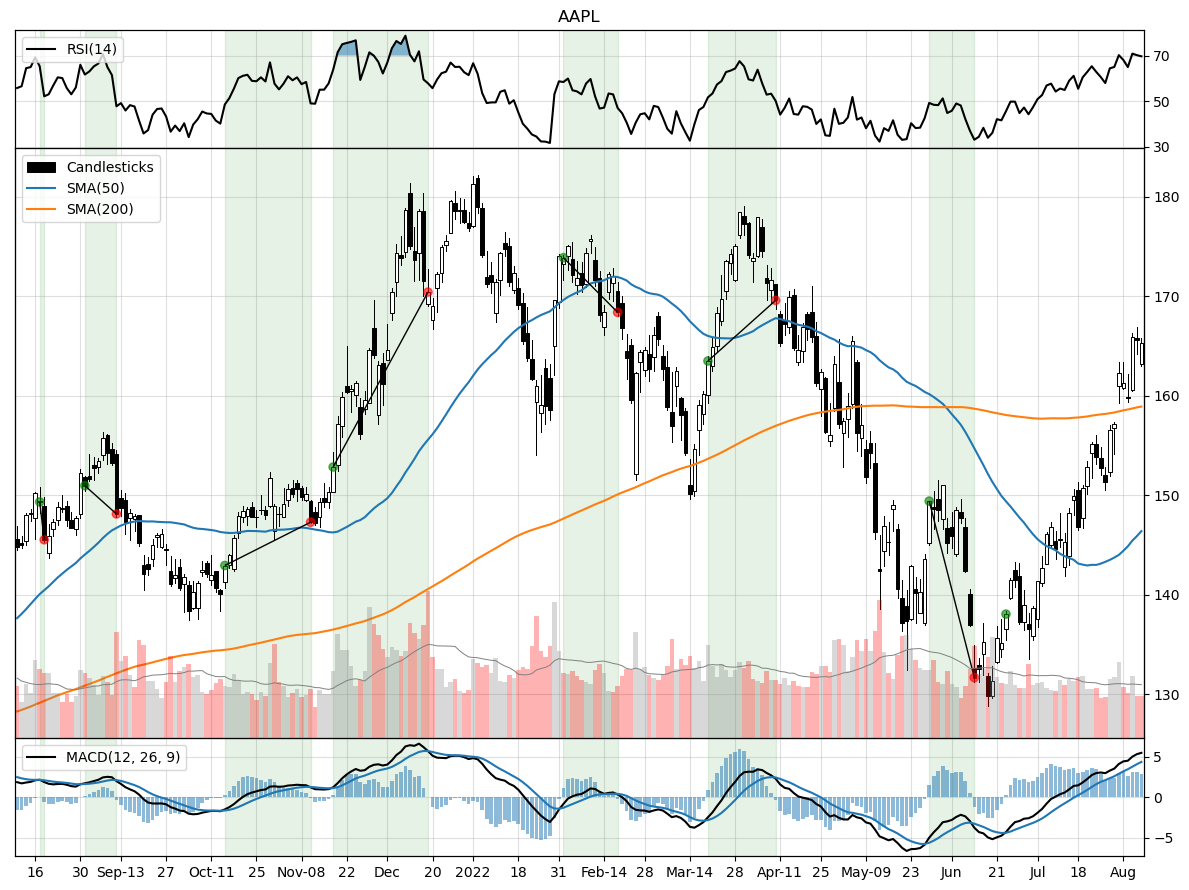

In [13]:
%%time

indicators = [
    Candlesticks(use_bars=False), SMA(50), SMA(200),
    Volume(), RSI(), MACD(), TradeMarker()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)



CPU times: total: 281 ms
Wall time: 289 ms


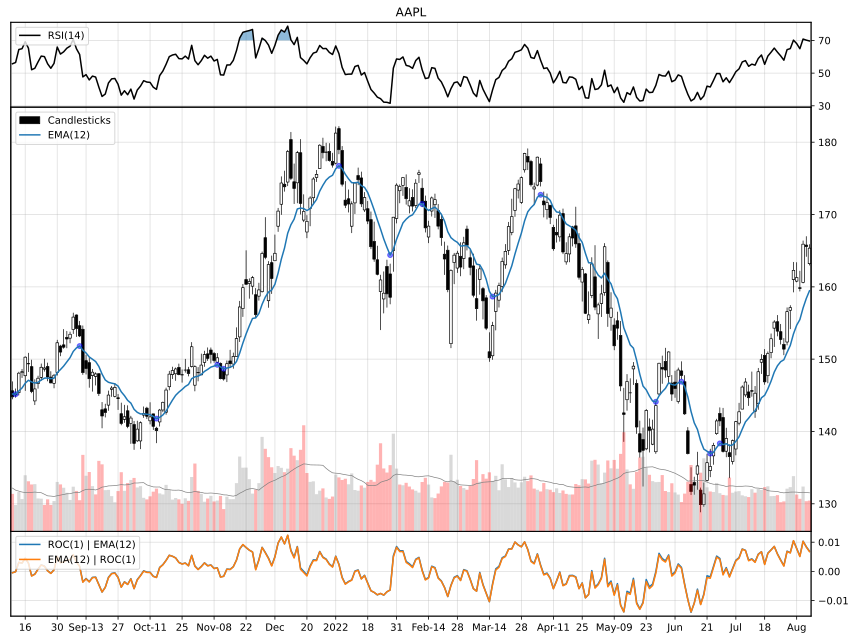

In [26]:
%%time

# testing pipe (__or__)

indicators = [Candlesticks() , EMA(12), Peaks(4), Volume(),
              RSI(),
              ROC(1) | EMA(12), SameAxes(), EMA(12) | ROC(1),
              ]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)




CPU times: total: 562 ms
Wall time: 575 ms


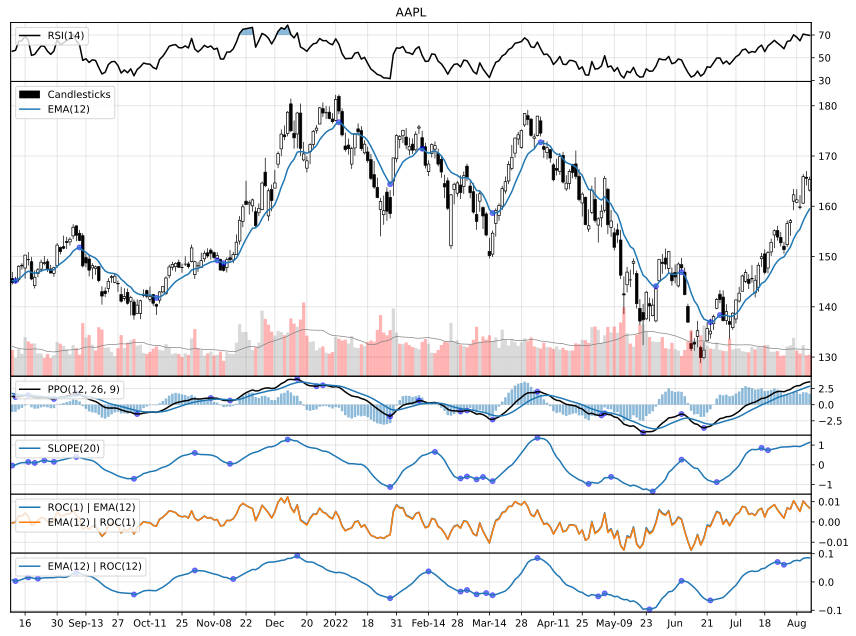

In [27]:
%%time

# testing arobas and ampersand

indicators = [Candlesticks() , EMA(12), Peaks(4), Volume(),
              RSI(),
              PPO(), Peaks(3, item='ppo'),
              SLOPE(20), Peaks(3),
              ROC(1) | EMA(12), EMA(12) | ROC(1) | SameAxes(),
              EMA(12) | ROC(12), Peaks(3),
              ]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)


CPU times: total: 656 ms
Wall time: 669 ms


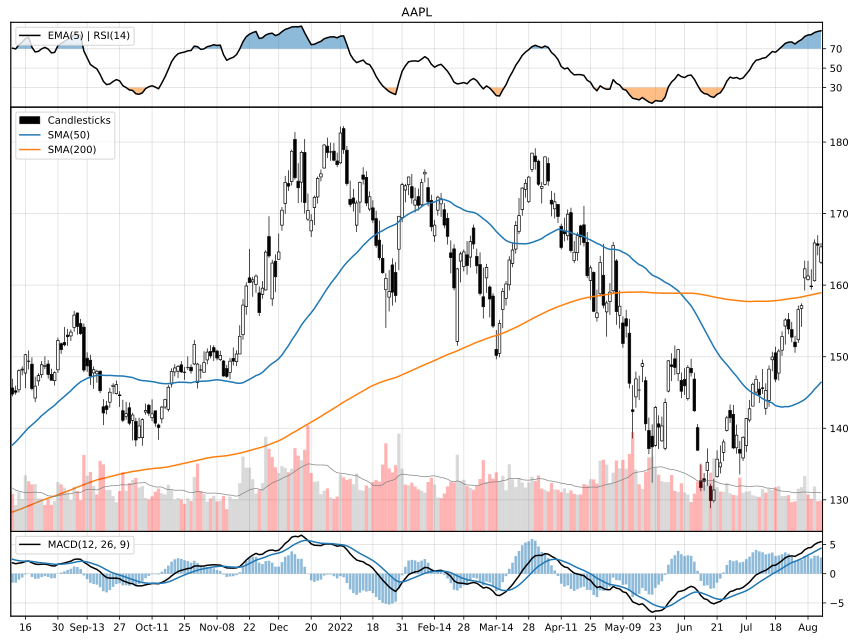

In [28]:
%%time

indicators = [Candlesticks() , SMA(50), SMA(200), Volume(),
              EMA(5) | RSI(),
              MACD(),
              ]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
